# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Loading Data

In [3]:
train_start = pd.read_csv('/content/train.csv')
test_start = pd.read_csv('/content/test.csv')
sample_test = pd.read_csv("/content/sample_submission.csv")

In [4]:
test_start.shape

(10900, 10)

In [5]:
train_start.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


The Unnamed: 0 column is of no use, so dropping that

In [6]:
id = test_start['Unnamed: 0']

In [7]:
train_start.drop('Unnamed: 0', axis=1, inplace=True)
test_start.drop('Unnamed: 0', axis=1, inplace=True)

# Exploratory Data Analysis

In [8]:
train_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [9]:
train_start.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Nice, There is no null values present in this dataset

In [10]:
train_start.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


clear any data we sure they are outliers in shape (x,y,z)

In [11]:
train_set= train_start.copy()
test_set = test_start.copy()
train_set[['x','y','z']]=train_set[['x','y','z']].replace(0,np.NaN)
# test_set[['x','y','z']]=train_set[['x','y','z']].replace(0,np.NaN)

In [12]:
train_set.dropna(inplace=True)
# test_set.dropna(inplace=True)

In [13]:
test_set.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [14]:
test_set.shape

(10900, 9)

# Separating Numerical and Categorical Columns

In [15]:
categorical_data = train_set[['clarity', 'color', 'cut']]
numerical_data = train_set[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]
for c in categorical_data.columns:
    print(categorical_data[c].unique())

['SI1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'VS1' 'IF']
['E' 'I' 'J' 'F' 'H' 'D' 'G']
['Premium' 'Good' 'Very Good' 'Fair' 'Ideal']


# Visualizing the Categorical variables distribution

In [16]:
def countplot_percentage(data, column, title=""):
    # number of rows
    total = data.shape[0]

    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.countplot(data[column],order= data[column].value_counts().index)
    ax.set_title(title)

    # to add a percentage to the bars
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{percentage}', (x + width/2, y + height*1.02), ha='center')

    plt.ylabel("Count")
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


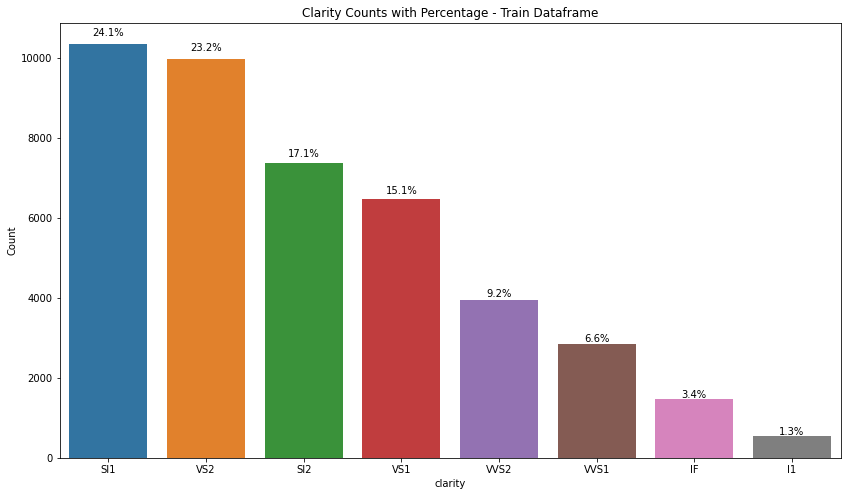

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


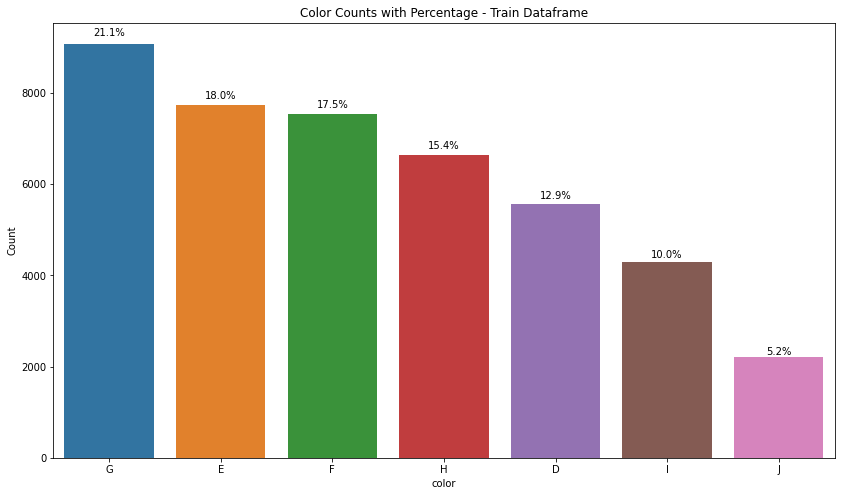

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


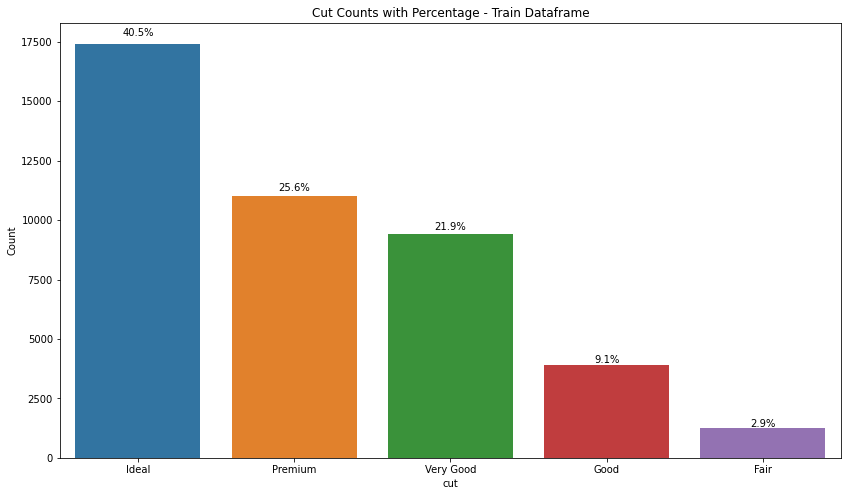

In [17]:
cate_titles = ['Clarity Counts with Percentage', 'Color Counts with Percentage', 'Cut Counts with Percentage']
for i, col in enumerate(categorical_data.columns):
    countplot_percentage(categorical_data, col, cate_titles[i] + " - Train Dataframe")
plt.show()

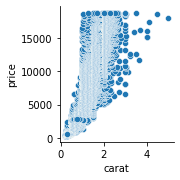

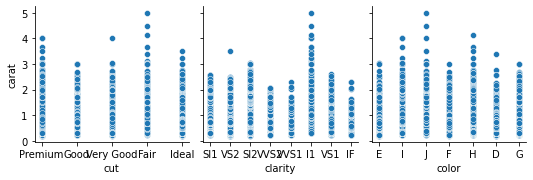

In [18]:
# plot price vs. carat
df=train_set
sns.pairplot(df, x_vars=['carat'], y_vars = ['price'])
# plot carat vs other Cs
sns.pairplot(df, x_vars=['cut', 'clarity', 'color'], y_vars = ['carat'])
plt.show()

# Visualizing the Numerical variables distribution

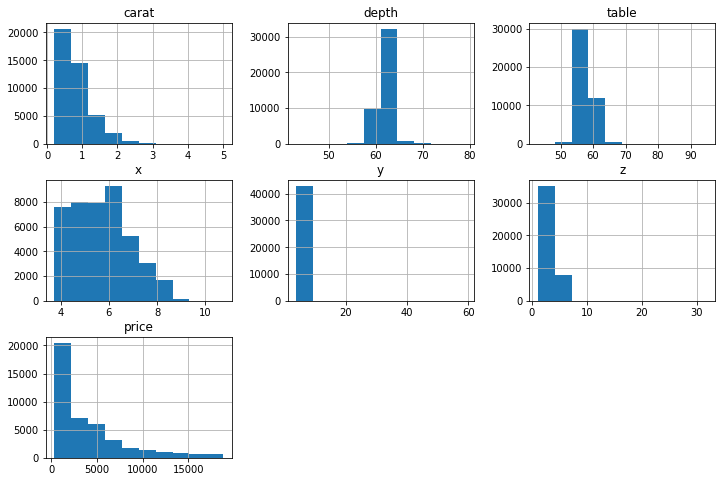

In [19]:
numerical_data.hist(figsize=(12, 8))
plt.show()

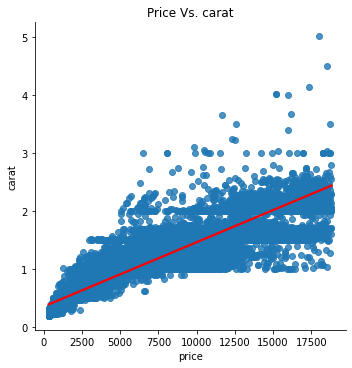

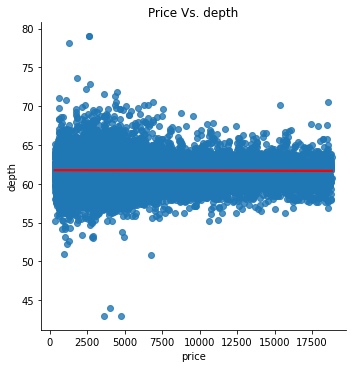

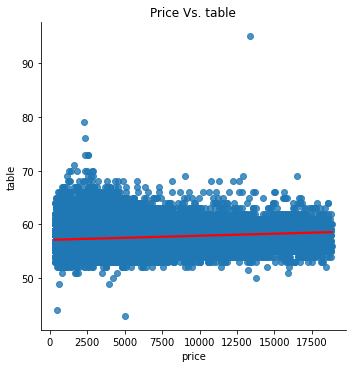

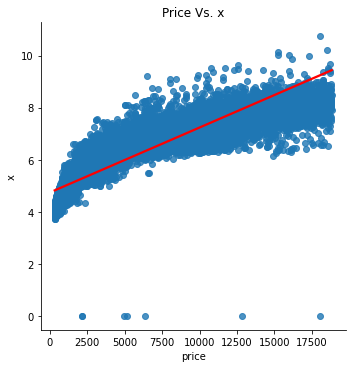

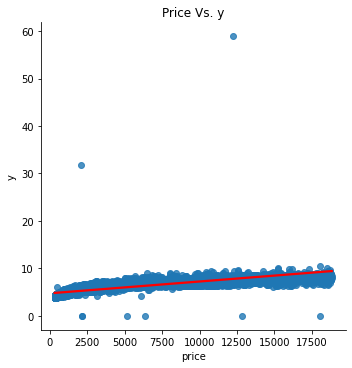

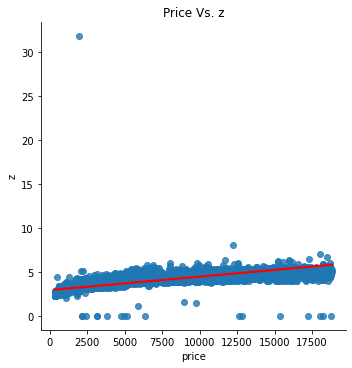

In [20]:
for col in numerical_data.columns:
    if col == "price":
        continue
    ax = sns.lmplot(data=train_start, x='price', y=col,line_kws={'color' : 'r'})
    plt.title("Price Vs. {}".format(col))
    plt.show()

# Handling Outliers

In [21]:
def outliers_clean(data):
    data = data[(data["depth"]<66)&(data["depth"]>57)]
    data = data[(data["table"]<65)&(data["table"]>50)]
    data = data[(data["x"]<30)]
    data = data[(data["y"]<30)]
    data = data[(data["z"]<30)&(data["z"]>2)]
    data.shape

    return data


In [22]:
train_set  = outliers_clean(train_set)
# test_set  = outliers_clean(test_set)

In [23]:
numerical_data = train_set[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

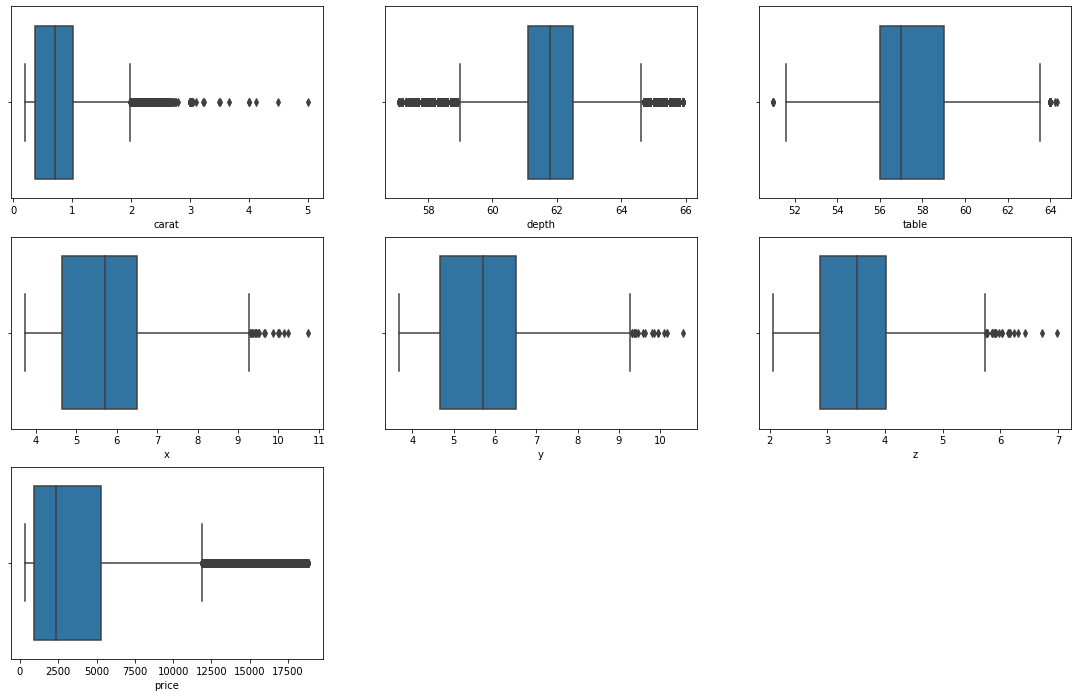

In [24]:
i = 1
plt.figure(figsize=(19, 12))
for c in numerical_data.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=numerical_data[c])
    i+=1

# Ordinal Encoding

* Fair --> Good --> Very Good --> Premium --> Ideal
* J --> I --> H --> G --> F --> E --> D
* I1 --> SI2 --> SI1 --> VS2 --> VS1 --> VVS2 --> VVS1 --> IF

In [25]:
from sklearn.preprocessing import LabelEncoder
label_data = train_set.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in categorical_data:
    label_data[col] = label_encoder.fit_transform(label_data[col])
    print(list(label_encoder.classes_))

['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
['D', 'E', 'F', 'G', 'H', 'I', 'J']
['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']


#labelEncoder does not give us a appropriate order

let's make one

In [26]:
train_set['cut'] = train_set['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
train_set['color'] = train_set['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
train_set['clarity'] = train_set['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

test_set['cut'] = test_set['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
test_set['color'] = test_set['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
test_set['clarity'] = test_set['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

In [27]:
train_set

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
1,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
2,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
3,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48
4,0.24,2,1,6,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...
43035,0.72,3,6,2,62.7,59.0,2757,5.69,5.73,3.58
43036,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
43037,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
43038,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


In [28]:
test_set

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,5,1,61.5,55.0,3.95,3.98,2.43
1,0.23,1,5,4,56.9,65.0,4.05,4.07,2.31
2,0.26,2,2,2,61.9,55.0,4.07,4.11,2.53
3,0.23,2,2,4,59.4,61.0,4.00,4.05,2.39
4,0.23,4,0,4,62.8,56.0,3.93,3.90,2.46
...,...,...,...,...,...,...,...,...,...
10895,0.70,2,5,3,62.8,60.0,5.59,5.65,3.53
10896,0.70,2,6,4,63.1,59.0,5.67,5.58,3.55
10897,0.70,2,5,3,60.5,59.0,5.71,5.76,3.47
10898,0.70,2,5,3,61.2,59.0,5.69,5.72,3.49


# Correlation of all variables with Price

In [29]:
train_set.corr()['price'].sort_values(ascending=False)

price      1.000000
carat      0.926783
y          0.893201
x          0.892033
z          0.888962
table      0.145266
depth     -0.018127
cut       -0.068968
clarity   -0.156947
color     -0.176732
Name: price, dtype: float64

# Heatmap 

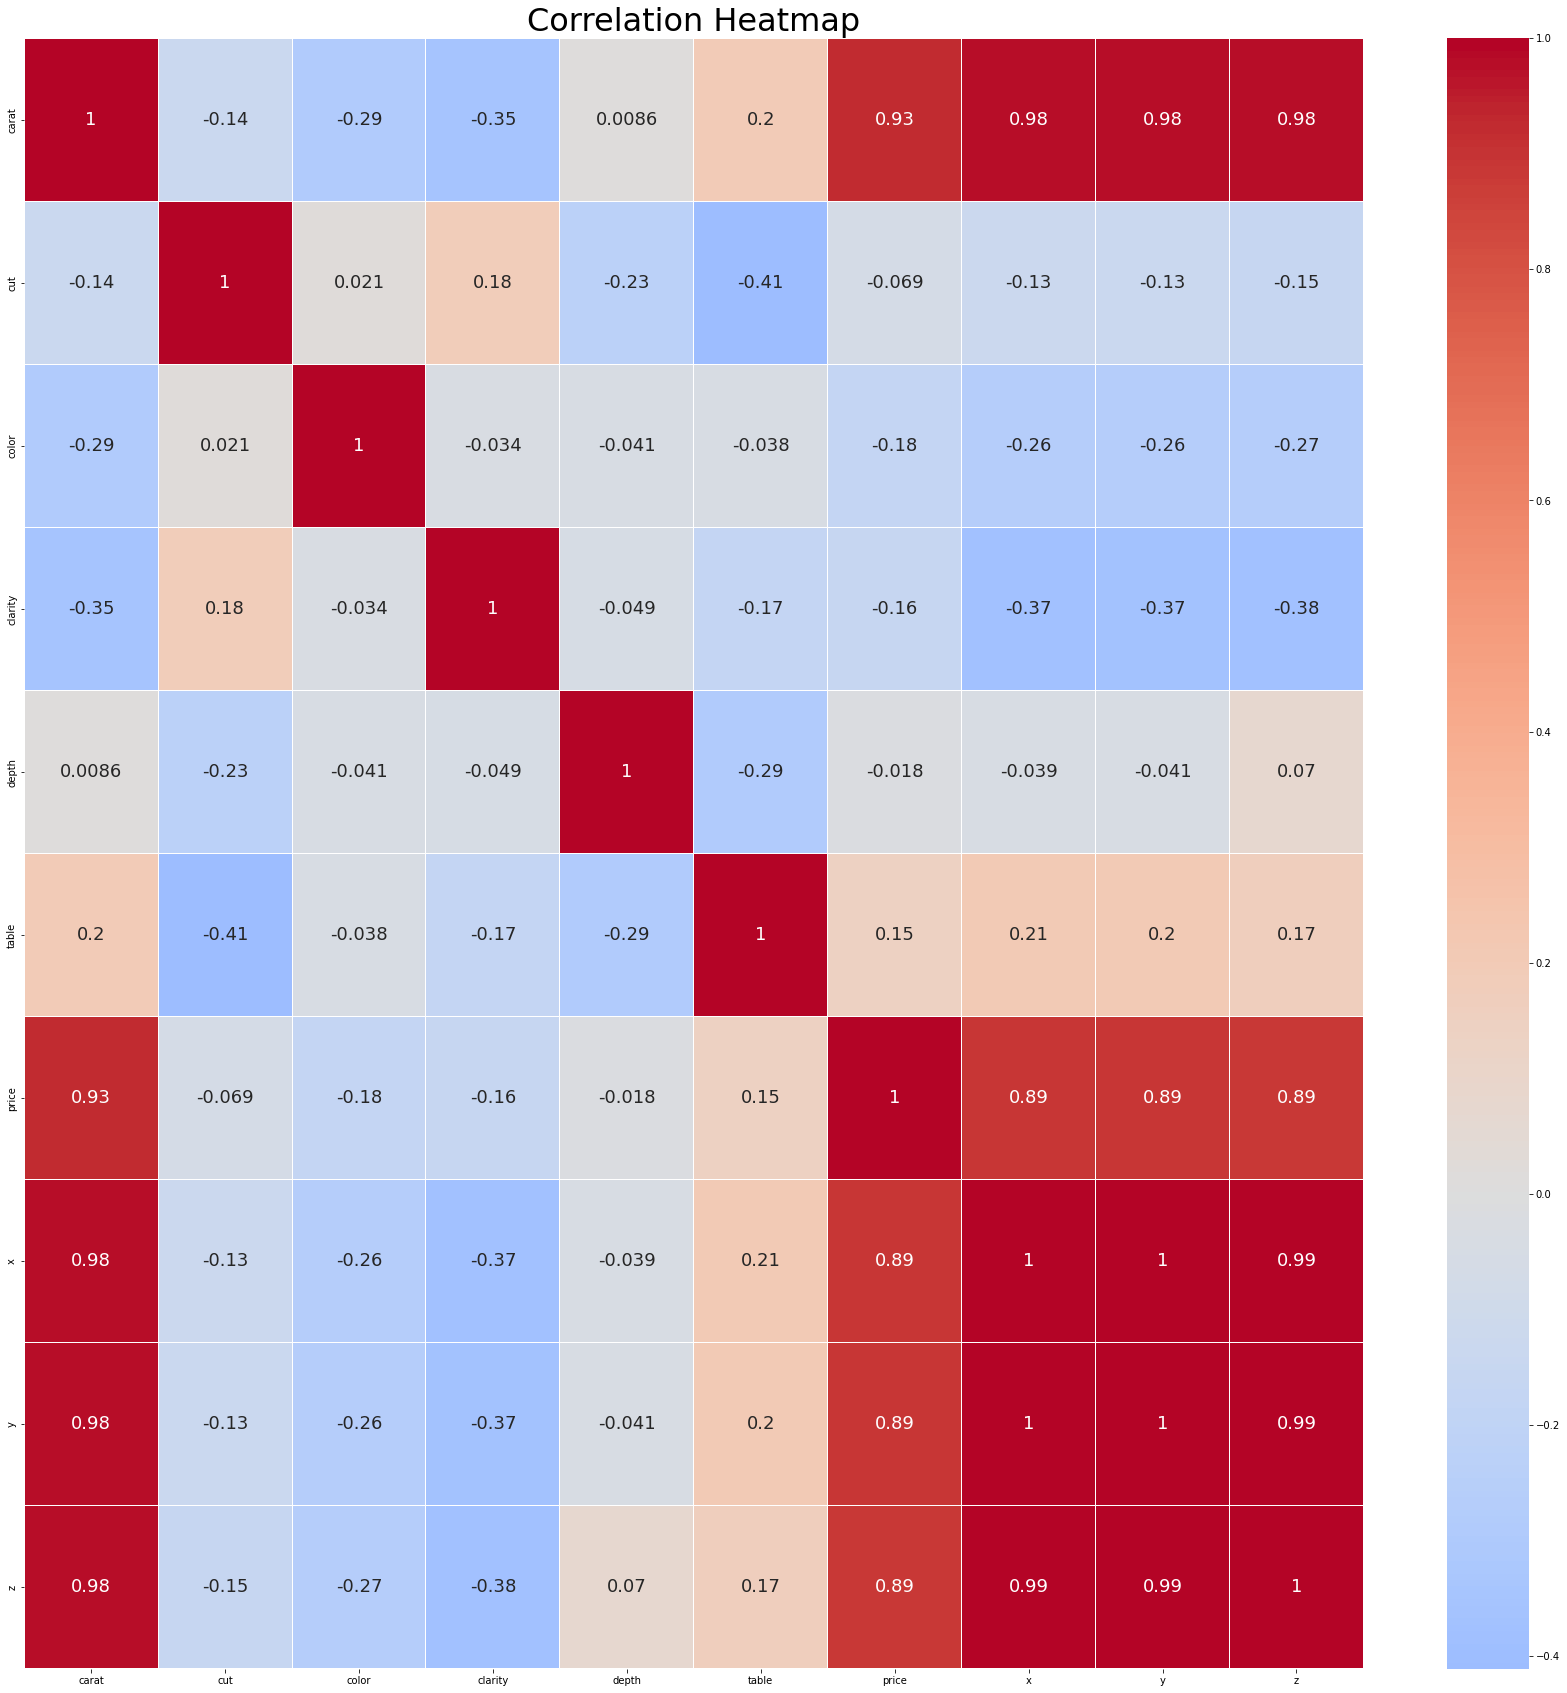

In [30]:
plt.figure(figsize=(30,30));
sns.heatmap(train_set.corr(),annot=True,cmap='coolwarm',linewidth=0.01, annot_kws={'size': 18},center=0);
plt.title('Correlation Heatmap',fontsize=32,fontweight=5);

# Split train and test sets


In [31]:
x = train_set.drop(columns='price')
y = train_set['price']

# Training Split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)


print(X_train.shape, X_test.shape)

(29628, 9) (12699, 9)


In [32]:
def meansquarederror(y_pred, y_test):
    lin_mse = mean_squared_error(y_pred, y_test)
    lin_rmse = np.sqrt(lin_mse)
    return lin_rmse

In [33]:
from sklearn.preprocessing import StandardScaler

scaling= StandardScaler()

X_train_scaled= scaling.fit_transform(X_train)
X_test_scaled= scaling.fit_transform(X_test)

# Select and train a model

In [34]:
rmse= []
models = ['Linear Regression' ,'Decision Trees','RandomForest Regression','XGBoost']

# Linear Regression

In [35]:
reg_all = LinearRegression()
# Fit the model to X_train and y_train
reg_all.fit(X_train,y_train) 
# Make predictions
y_pred=reg_all.predict(X_test)
rmse.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

1179.9531530836412

# Decision Trees

In [36]:
reg_all = DecisionTreeRegressor()
reg_all.fit(X_train,y_train) 
y_pred=reg_all.predict(X_test)
rmse.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

746.4643774069452

#RandomForest Regression

In [37]:
reg_all = RandomForestRegressor()
reg_all.fit(X_train,y_train) 
y_pred=reg_all.predict(X_test)
rmse.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

547.7745125186641

# XGBoost

In [38]:
reg_all = XGBRegressor()
reg_all.fit(X_train , y_train)
y_pred=reg_all.predict(X_test)
rmse.append(meansquarederror(y_pred, y_test))
meansquarederror(y_pred, y_test)

[20:06:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


610.9835309095572

In [39]:
rmse

[1179.9531530836412, 746.4643774069452, 547.7745125186641, 610.9835309095572]

#Sort Model

In [40]:
compare = pd.DataFrame({'Algorithms' : models , 'RMSE' : rmse})
compare.sort_values(by='RMSE' ,ascending=True)

,Algorithms,RMSE
2,RandomForest Regression,547.774513
3,XGBoost,610.983531
1,Decision Trees,746.464377
0,Linear Regression,1179.953153


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


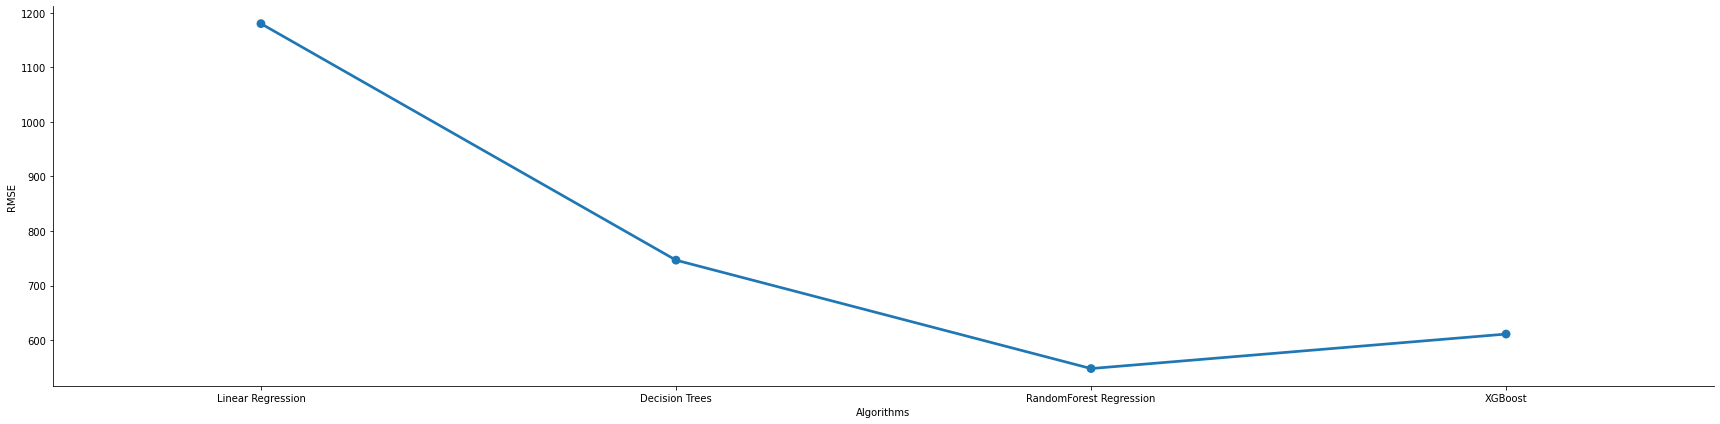

In [41]:
sns.factorplot(x='Algorithms', y='RMSE' , data=compare, size=6 , aspect=4)

#Cross Val

In [43]:
forest_reg = RandomForestRegressor()
# forest_reg.fit(x,y) 
forest_rmse = cross_val_score(forest_reg, X_train,
y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_rmse)
print("scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())

scores: [556.42935743 530.9854871  548.13804763 572.91433541 558.85246162
 572.54352867 597.23678185 559.72436803 546.06925694 509.08534632]
Mean: 555.1978970998377


In [44]:
dec_model = DecisionTreeRegressor()
# dec_reg.fit(x,y) 
dec_rmse = cross_val_score(dec_model,
X_train, y_train,scoring="neg_mean_squared_error", cv=10)
dec_rmse_scores = np.sqrt(-dec_rmse)
print("scores:", dec_rmse_scores)
print("Mean:", dec_rmse_scores.mean()) 

scores: [796.66880606 756.49045553 769.29062627 782.09284435 793.58500882
 772.01252172 735.74009055 766.55612973 789.20915194 704.18678549]
Mean: 766.5832420471557


In [46]:
XGB_model = XGBRegressor()
# XGB_reg.fit(x,y) 
XGB_rmse = cross_val_score(XGB_model,
X_train, y_train,scoring="neg_mean_squared_error", cv=10)
XGB_rmse_scores = np.sqrt(-XGB_rmse)
print("scores:", XGB_rmse_scores)
print("Mean:", XGB_rmse_scores.mean()) 

[20:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

#Tuning

In [50]:
 parameters = {"model__learning_rate": [0.1, .02, 0.03],
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [6, 7, 8]}
 RegModel=XGBRegressor()

 grid_search = GridSearchCV(RegModel, parameters, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
 grid_search.fit(X_train,y_train)
 y_pred=grid_search.predict(X_test)
 meansquarederror(y_pred, y_test)

[21:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

610.9835309095572

In [51]:
print("Best params:",grid_search.best_params_,sep='\t')


Best params:	{'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 100}


In [54]:
final_model = XGBRegressor(learning_rate= 0.1, max_depth= 6, n_estimators= 100)
final_model.fit(x, y)
y_pred = final_model.predict(test_set)

[21:29:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [55]:
labels = list(y_pred)

In [56]:
labels

[434.28366,
 464.28732,
 394.36816,
 368.31583,
 297.82422,
 495.738,
 394.93698,
 511.96475,
 497.45825,
 444.87885,
 438.14304,
 449.78156,
 484.1334,
 461.53986,
 519.06274,
 431.77365,
 479.80655,
 553.0217,
 501.79202,
 564.58905,
 499.9451,
 547.6796,
 568.797,
 592.95306,
 588.01794,
 602.83527,
 596.84076,
 616.27026,
 641.8775,
 594.95374,
 2670.1055,
 2537.408,
 2828.1182,
 2933.0457,
 2988.2046,
 2298.4626,
 2386.4897,
 2352.7114,
 2318.335,
 3234.8386,
 3055.0186,
 2847.8792,
 2772.2146,
 2800.394,
 3079.4666,
 3220.5593,
 2519.2334,
 2720.9114,
 2706.8545,
 2362.2893,
 2746.4937,
 2972.668,
 2720.0518,
 3397.2925,
 2871.1445,
 2496.1516,
 2521.3994,
 2454.9607,
 2481.3374,
 2442.2878,
 2563.6533,
 2624.2656,
 2403.0173,
 2455.6719,
 2510.344,
 2598.8171,
 2416.626,
 2564.5586,
 2968.4185,
 3017.2458,
 2837.795,
 2755.5918,
 2715.503,
 2802.4502,
 2784.2134,
 2917.7249,
 2868.5657,
 3096.9512,
 3165.8643,
 2857.887,
 2725.6685,
 3077.9924,
 2921.2786,
 2934.827,
 2564.8132,

In [57]:
data = pd.DataFrame({'Unnamed: 0':id, 'price':labels})

In [58]:
data.to_csv("submission.csv",index=False,header = 1)

In [59]:
from google.colab import files

files.download('submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>